## Dataset

**Abstract**: The [data](https://archive.ics.uci.edu/ml/datasets/bank+marketing) is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y)

### Attribute Information:

#### bank client data:
1 - age (numeric) <br>
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') <br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')<br>
5 - default: has credit in default? (categorical: 'no','yes','unknown')<br>
6 - housing: has housing loan? (categorical: 'no','yes','unknown')<br>
7 - loan: has personal loan? (categorical: 'no','yes','unknown')<br>

#### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone') <br>
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.<br>

#### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
14 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br>

#### social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)<br>
17 - cons.price.idx: consumer price index - monthly indicator (numeric) <br>
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) <br>
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)<br>
20 - nr.employed: number of employees - quarterly indicator (numeric)<br>

#### <u> Output variable (desired target): </u><br>
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')<br>

### Term Deposit

A [term deposit](https://www.investopedia.com/terms/t/termdeposit.asp) is a fixed-term deposit held at a financial institution. They are generally short-term deposits with maturities ranging anywhere from a month to a few years. When a term deposit is purchased, the client understands that the money can only be withdrawn after the term has ended or by giving a predetermined number of days notice. 

Term deposits are also known as certificates of deposit (CDs), time deposits and "bonds" in England.

## 2. Exploring Data

In [49]:
# Jupyter Notebook with Matplotlib Inline
%matplotlib notebook
# Import required modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math

In [2]:
# Read the cleaned datasets
train = pd.read_csv("train.csv", delimiter=',') 
test = pd.read_csv("test.csv", delimiter=',')

In [3]:
# Shape of training dataset 
train.shape

(32950, 21)

In [4]:
# Shape of test dataset
test.shape

(8238, 21)

In [5]:
# Checking the counts of responses 
train['y'].value_counts()

no     29208
yes     3742
Name: y, dtype: int64

Looking at the dataset, it might seem unbalanced (10% of 'YES'). However, given the problem at hand, this is quite balanced dataset since usually most financial datasets have   <b> `minor` </b>   class ranging anywhere from 1% to 15%. 

In [9]:
train.astype('object').describe().transpose()

,count,unique,top,freq
age,32950,78,31,1579
job,32950,12,admin.,8356
marital,32950,4,married,19984
education,32950,8,university.degree,9716
default,32950,3,no,26047
housing,32950,3,yes,17271
personal,32950,3,no,27154
contact_type,32950,2,cellular,20899
month,32950,10,may,11027
day,32950,5,thu,6881


### 2.1 Exploring Categorical Data

In [6]:
# All categorical variables in the dataset
print(train.select_dtypes(include=['O']).columns.values)

['job' 'marital' 'education' 'default' 'housing' 'personal' 'contact_type'
 'month' 'day' 'poutcome' 'y']


In [7]:
categorical_fields = ['job', 'marital', 'education', 'default', 'housing', 'personal', 'contact_type',
 'month', 'day', 'poutcome', 'y']

In [19]:
# Using Cross-Tabulation to compare the relationship between two variables
for col in categorical_fields:
    if col == 'y':
        continue
    else:
        print('Cross tabulation between `' + col + '` and target variable (`y`)')
        print(pd.crosstab(train[col], train.y, normalize = 'index'))
        print('------------------------------------------------------------------------')

Cross tabulation between `job` and target variable (`y`)
y                    no       yes
job                              
admin.         0.872427  0.127573
blue-collar    0.931175  0.068825
entrepreneur   0.914787  0.085213
housemaid      0.892771  0.107229
management     0.885897  0.114103
retired        0.743126  0.256874
self-employed  0.891115  0.108885
services       0.918064  0.081936
student        0.679558  0.320442
technician     0.890212  0.109788
unemployed     0.853629  0.146371
unknown        0.882784  0.117216
------------------------------------------------------------------------
Cross tabulation between `marital` and target variable (`y`)
y               no       yes
marital                     
divorced  0.893209  0.106791
married   0.897718  0.102282
single    0.859706  0.140294
unknown   0.838710  0.161290
------------------------------------------------------------------------
Cross tabulation between `education` and target variable (`y`)
y                      

**Note:** The idea behind normalizing the index in cross-tabulation is to get an idea as to which `variables` and their `class` can be consolidated for <u> Feature Engineering </u>

Classes of `job`, `education` and `month` are consolidated based on the percentage of `positive` class in the target variable (`y`).

<img src = "Category Consolidation.png">

### 2.2 Exploring Numerical Data

In [22]:
# Summary statistics of Quantitative variables
train.describe()

,age,duration,dcontacts,pdays,pcontacts,evr,cpi,cci,euribor,employees
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.047162,258.209256,2.573778,962.869954,0.172140,0.084549,93.576852,-40.500880,3.623133,5167.109053
std,10.439350,256.986844,2.779274,185.929211,0.495683,1.570456,0.579505,4.630458,1.734258,72.244745
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,3785.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [52]:
numerical = ['age', 'duration',  'dcontacts',  'pdays',  'pcontacts',  'evr',  'cpi',  'cci',  'euribor',  'employees']

<IPython.core.display.Javascript object>


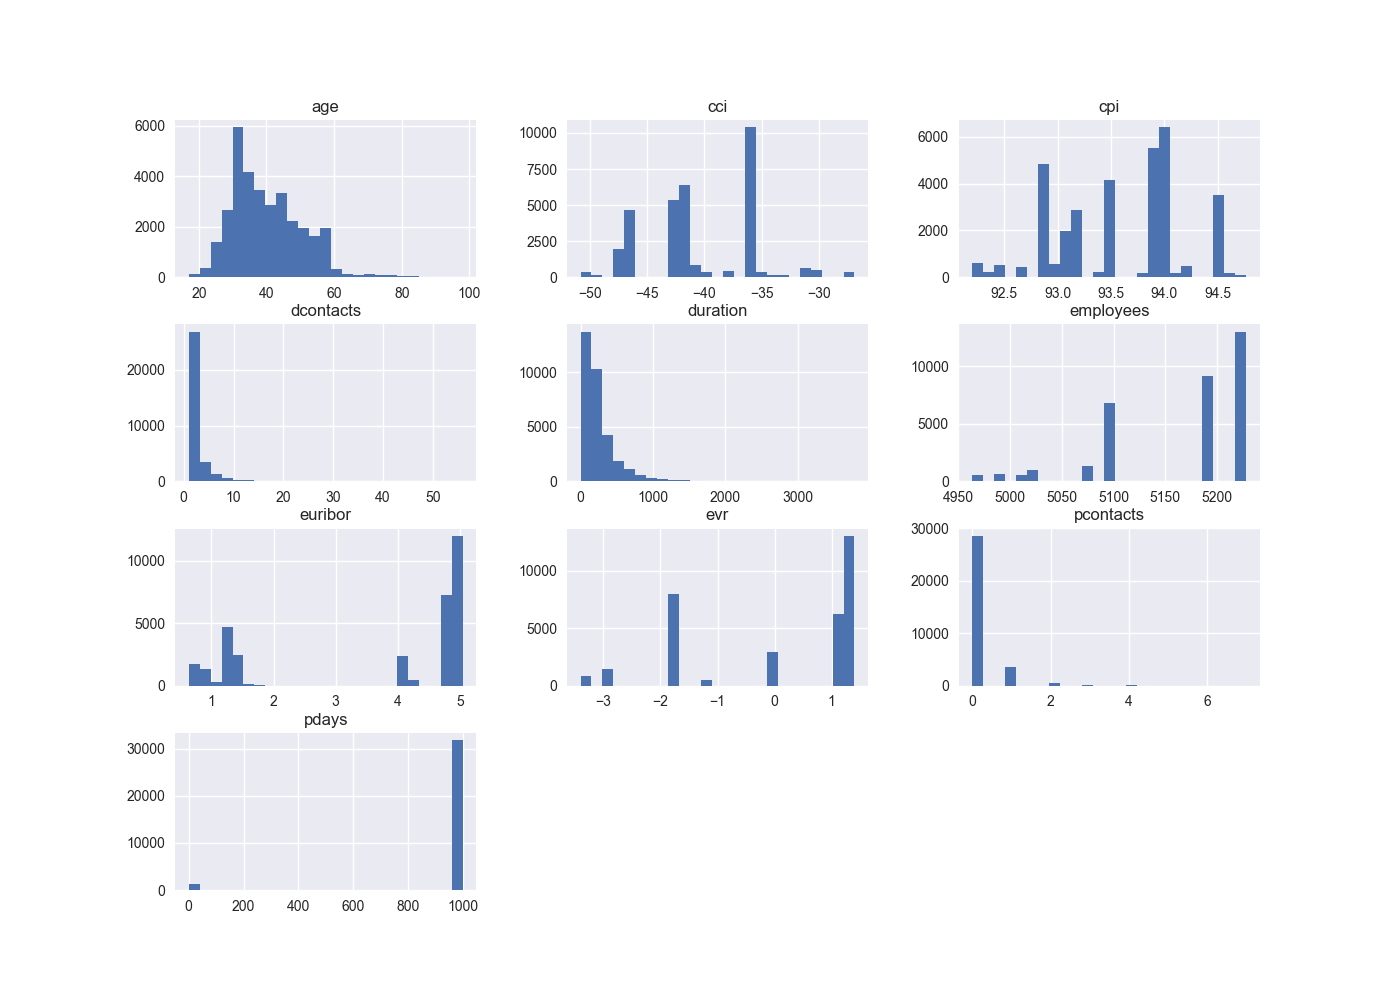

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000015AD5A58>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D097630>]], dtype=object)

In [64]:
train.hist(bins = 25, figsize = (14, 10))

<IPython.core.display.Javascript object>


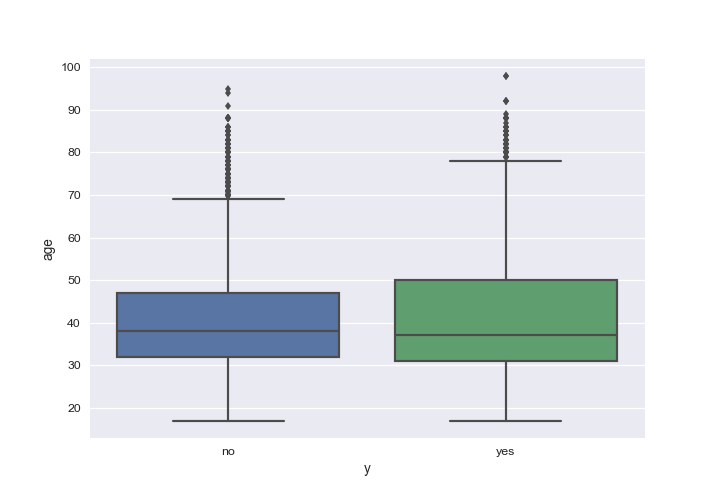

In [26]:
sns.boxplot(x="y", y = "age", data = train) 
#binning the age ...plot hist of age....bin according to job category.....bin hosuld of the same magnitude
#binning the age ...plot hist of age....bin hosuld of the same magnitude....bin according to job category

<IPython.core.display.Javascript object>


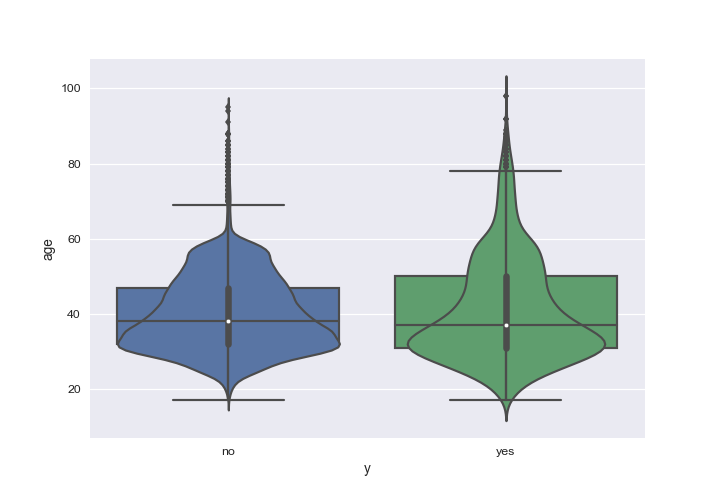

In [27]:
sns.boxplot(x="y", y="age", data=train)
sns.violinplot(x="y", y="age", data=train, size=6)

In [331]:
# train.boxplot(by="y", figsize=(12, 6))

In [359]:
# ax = sns.boxplot(x="y", y="age", data=train)
# ax = sns.stripplot(x="y", y="age", data=train, jitter=True, edgecolor="gray")
categorical = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

<IPython.core.display.Javascript object>


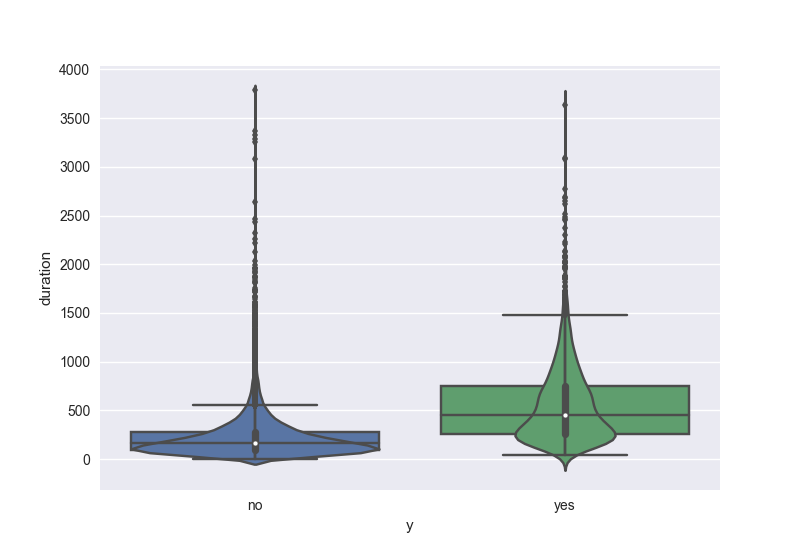

In [338]:
sns.boxplot(x="y", y = "duration", data = train)
sns.violinplot(x="y", y="duration", data=train, size=6) 
# include upper bound, also try bins  
# By 10s or 5s ?

<IPython.core.display.Javascript object>


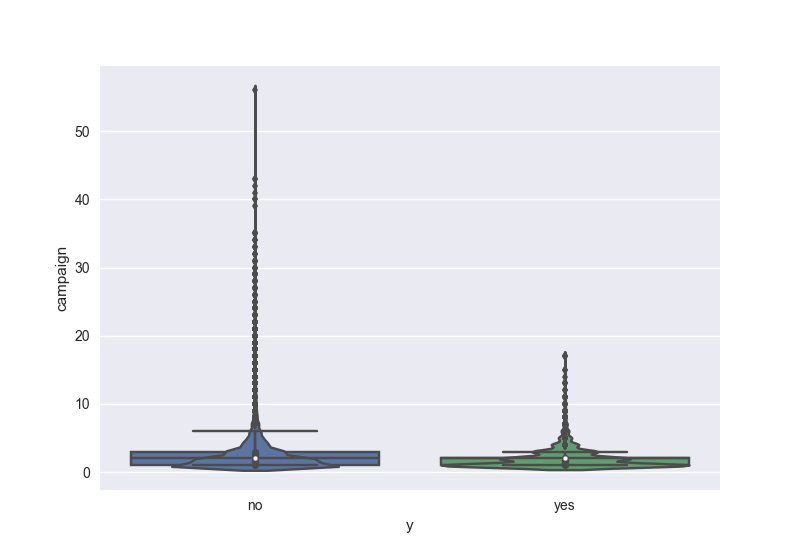

In [339]:
sns.boxplot(x="y", y = "campaign", data = train)
sns.violinplot(x="y", y="campaign", data=train, size=6) 

<IPython.core.display.Javascript object>


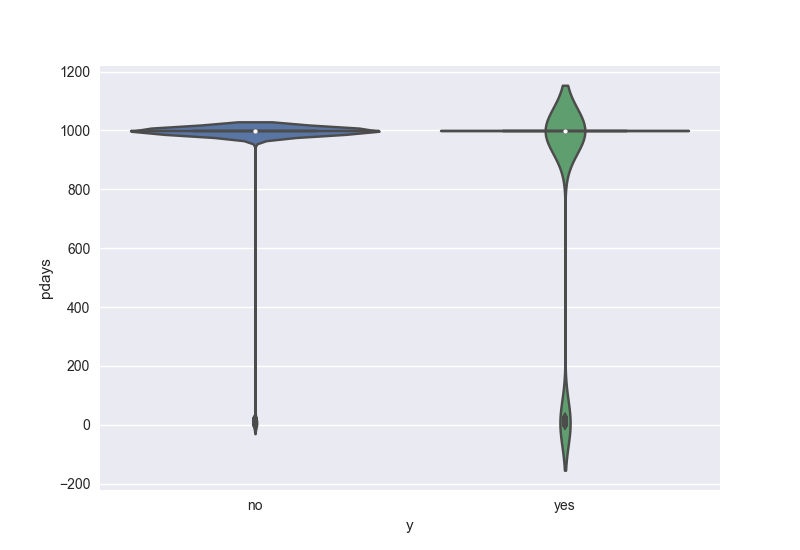

In [340]:
sns.boxplot(x="y", y = "pdays", data = train)
sns.violinplot(x="y", y="pdays", data=train, size=6) # replace the ouliers by lower and upper bounds

<IPython.core.display.Javascript object>


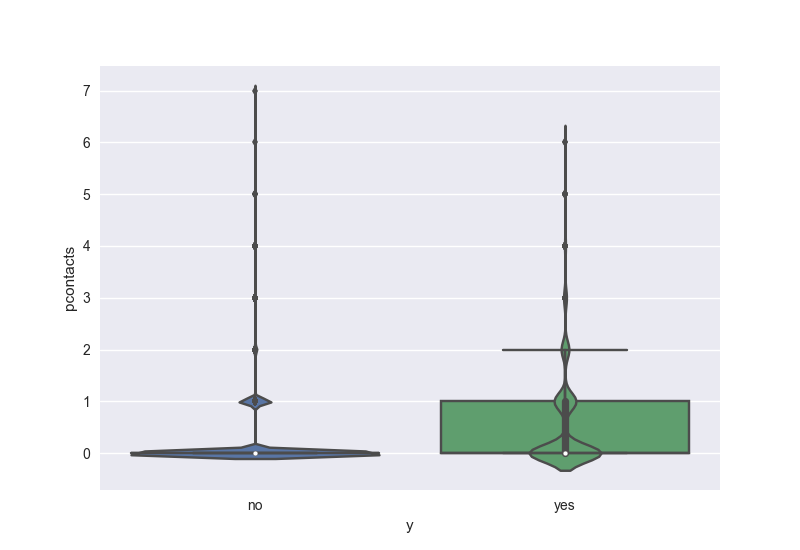

In [343]:
sns.boxplot(x="y", y = "pcontacts", data = train)
sns.violinplot(x="y", y="pcontacts", data=train, size=6) 

In [342]:
train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'pcontacts', 'poutcome', 'evr', 'cpi', 'cci', 'euribor', 'employees',
       'y'],
      dtype='object')

<IPython.core.display.Javascript object>


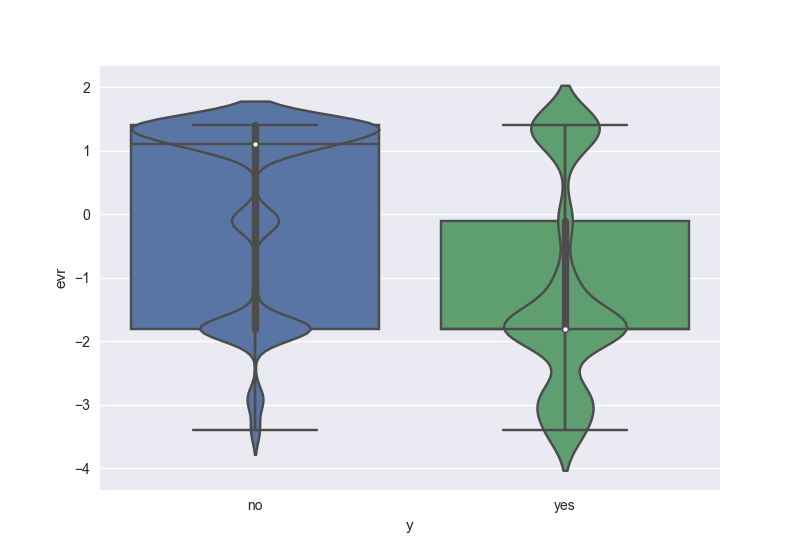

In [346]:
sns.boxplot(x="y", y = "evr", data = train)
sns.violinplot(x="y", y="evr", data=train, size=6) 

<IPython.core.display.Javascript object>


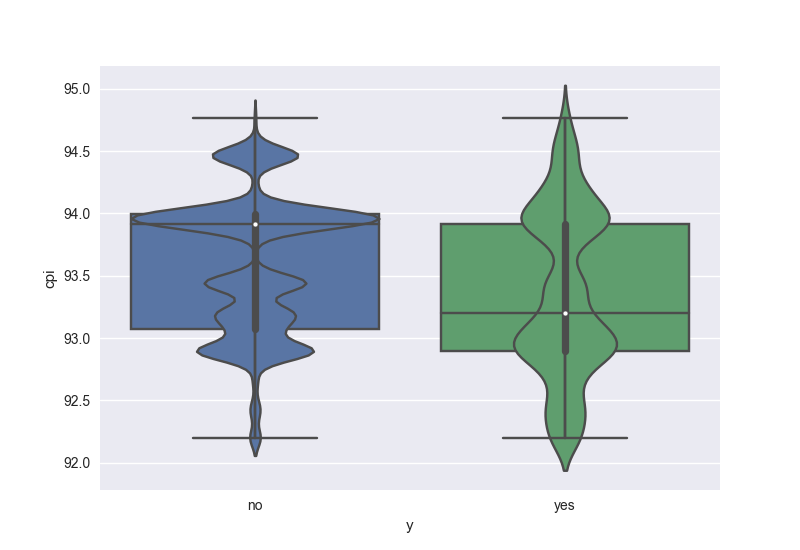

In [347]:
sns.boxplot(x="y", y = "cpi", data = train)
sns.violinplot(x="y", y="cpi", data=train, size=6) 

<IPython.core.display.Javascript object>


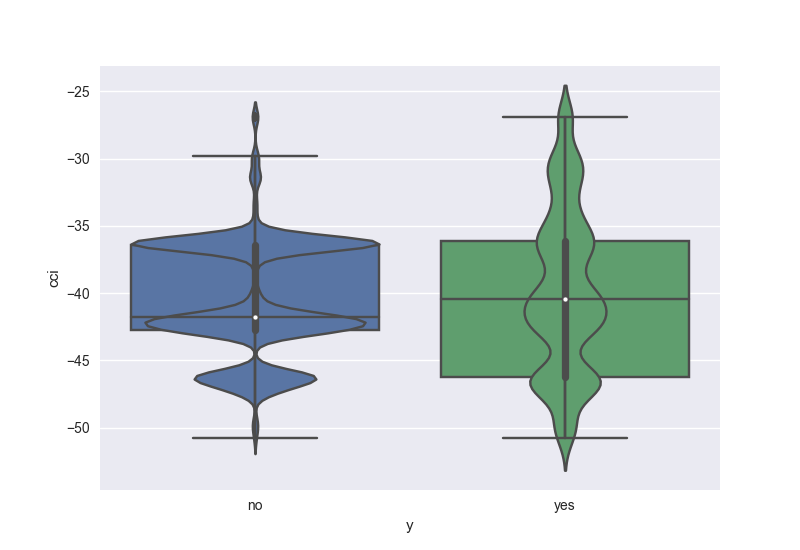

In [348]:
sns.boxplot(x="y", y = "cci", data = train)
sns.violinplot(x="y", y="cci", data=train, size=6) 

<IPython.core.display.Javascript object>


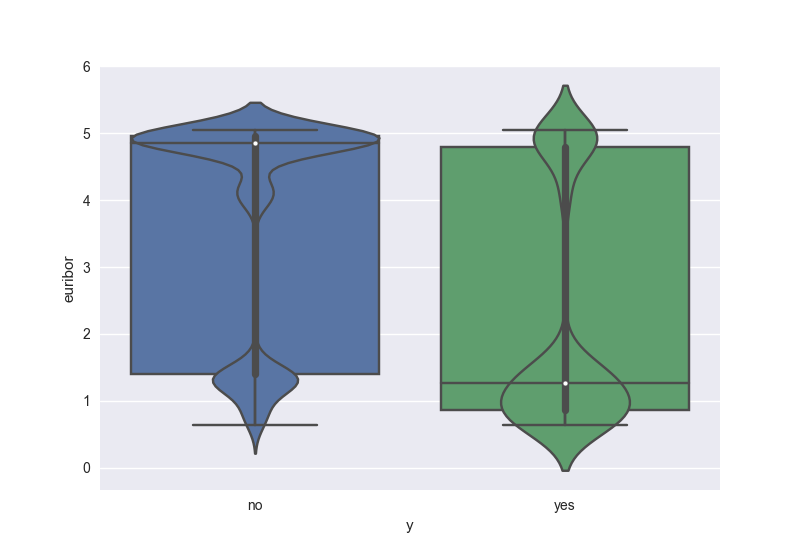

In [349]:
sns.boxplot(x="y", y = "euribor", data = train)
sns.violinplot(x="y", y="euribor", data=train, size=6) 

<IPython.core.display.Javascript object>


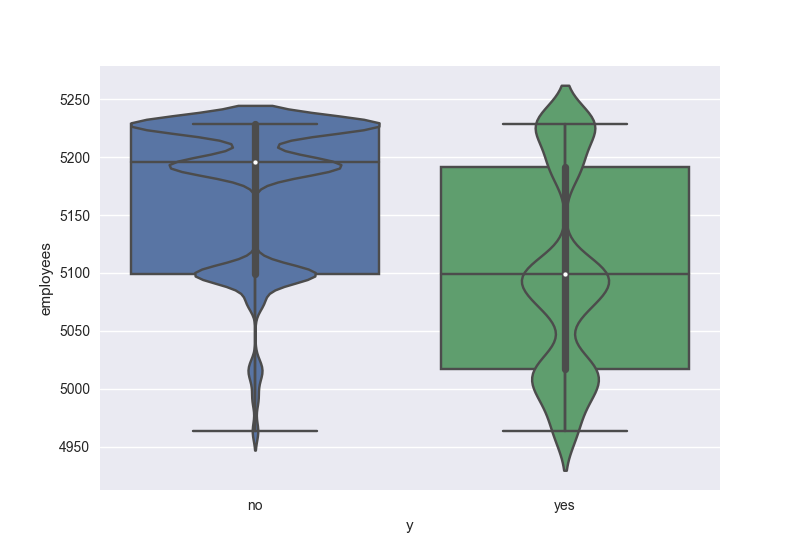

In [350]:
sns.boxplot(x="y", y = "employees", data = train)
sns.violinplot(x="y", y="employees", data=train, size=6) 

In [354]:
sns.pairplot(train, hue = "y", size = 1);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


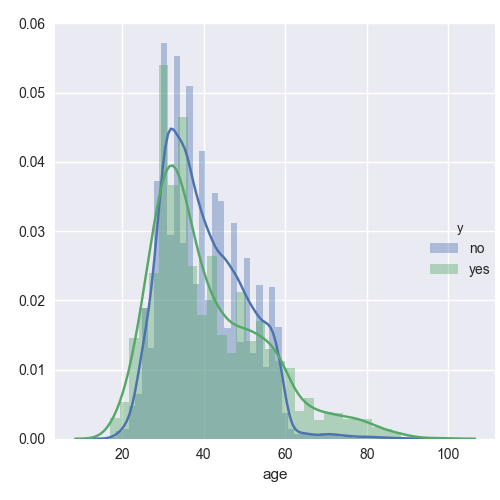

In [357]:
sns.FacetGrid(train, hue = "y", size = 5).map(sns.distplot, "age").add_legend();

In [367]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'pcontacts', 'poutcome', 'evr', 'cpi', 'cci', 'euribor', 'employees',
       'y'],
      dtype='object')

<IPython.core.display.Javascript object>


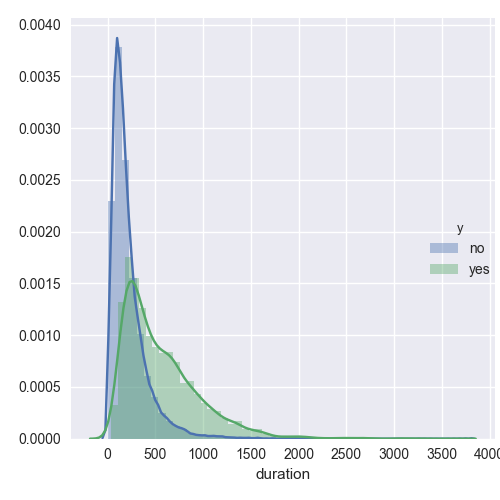

In [361]:
sns.FacetGrid(train, hue = "y", size = 5).map(sns.distplot, "duration").add_legend();

<IPython.core.display.Javascript object>


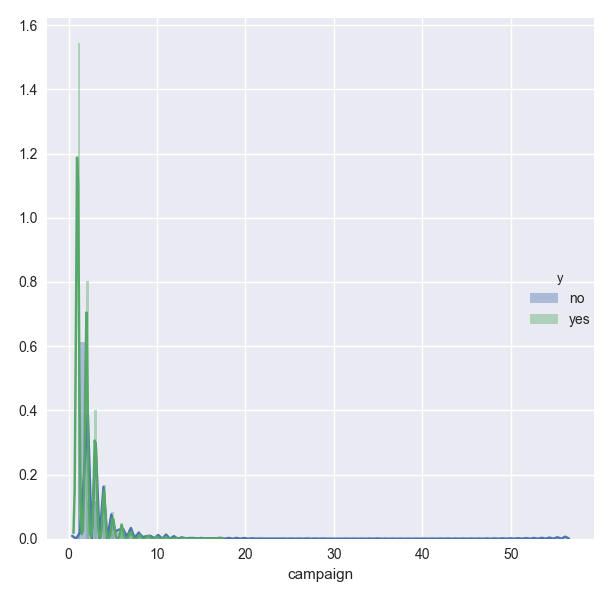

In [365]:
sns.FacetGrid(train, hue = "y", size = 6).map(sns.distplot, "campaign").add_legend();

<IPython.core.display.Javascript object>


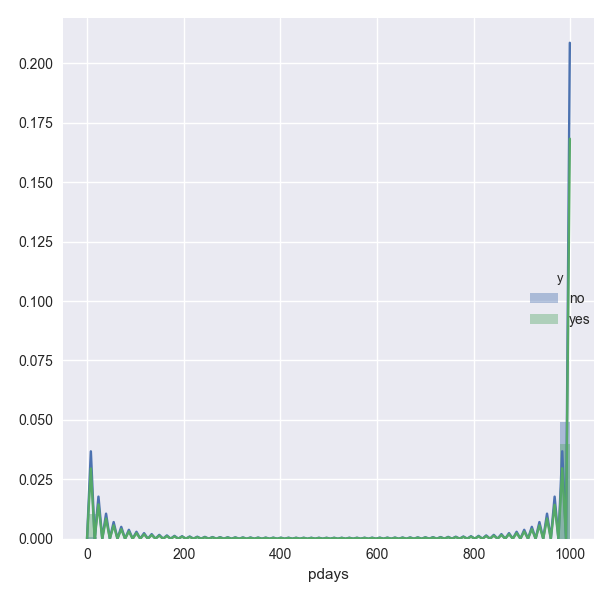

In [364]:
sns.FacetGrid(train, hue = "y", size = 6).map(sns.distplot, "pdays").add_legend();

<IPython.core.display.Javascript object>


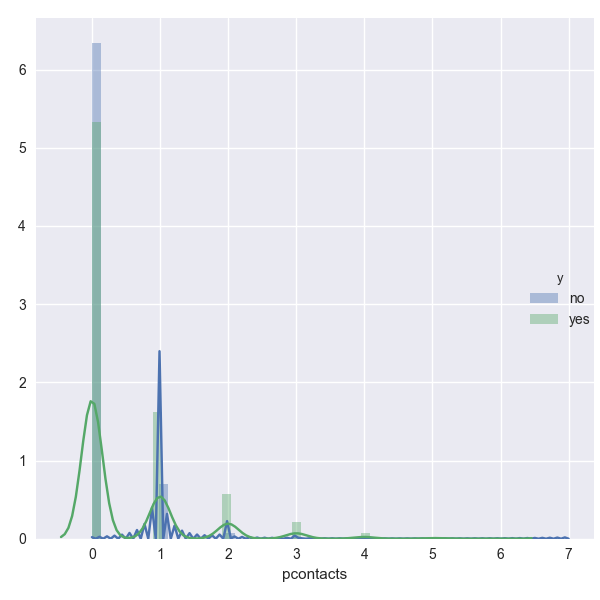

In [369]:
sns.FacetGrid(train, hue = "y", size = 6).map(sns.distplot, "pcontacts").add_legend();

<IPython.core.display.Javascript object>


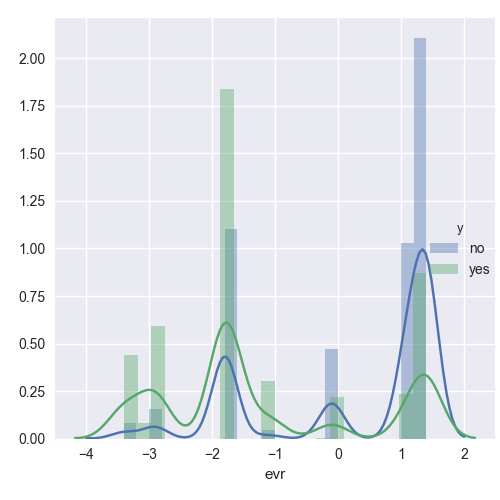

In [370]:
sns.FacetGrid(train, hue = "y", size = 5).map(sns.distplot, "evr").add_legend();

<IPython.core.display.Javascript object>


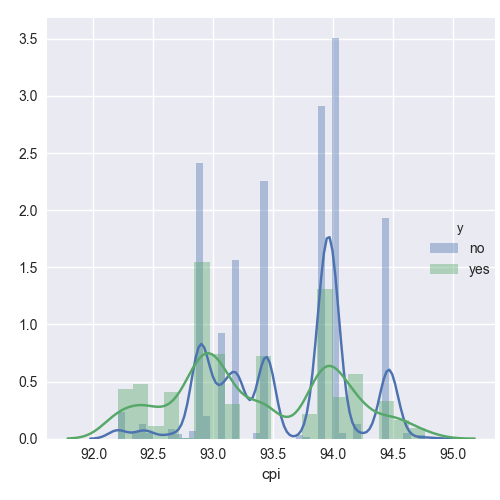

In [371]:
sns.FacetGrid(train, hue = "y", size = 5).map(sns.distplot, "cpi").add_legend();

<IPython.core.display.Javascript object>


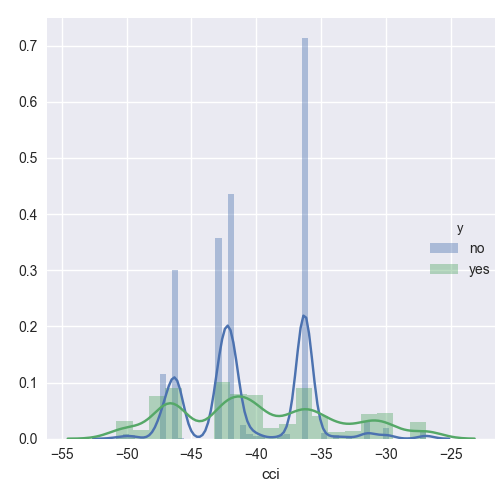

In [372]:
sns.FacetGrid(train, hue = "y", size = 5).map(sns.distplot, "cci").add_legend();

<IPython.core.display.Javascript object>


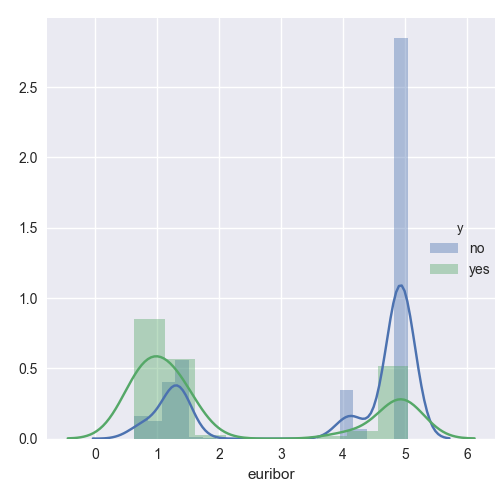

In [373]:
sns.FacetGrid(train, hue = "y", size = 5).map(sns.distplot, "euribor").add_legend();

<IPython.core.display.Javascript object>


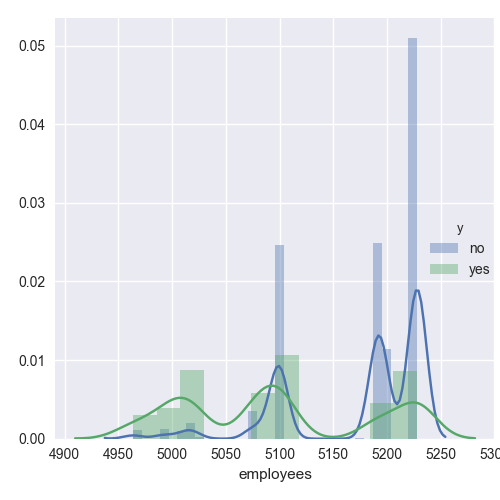

In [374]:
sns.FacetGrid(train, hue = "y", size = 5).map(sns.distplot, "employees").add_legend();

# Week 2

In [ ]:
# consolidate categories based on the % of Yes/No
# 1-0 Encoding Creating dummy varz 
# binning the age ...plot hist of age....bin according to job category.....bin hosuld of the same magnitude
# binning the age ...plot hist of age....bin hosuld of the same magnitude....bin according to job category

In [29]:
# Consolidating different levels of categorical variables with respect to 
# Percentages, Counts and Positive responses 

In [14]:
#Creating seperate dataframes for each categorical merge
# Categorical merge based on the % of YES.
trn_j1 = train.copy()
trn_e1 = train.copy()
trn_m1 = train.copy()

In [15]:
trn_j1['job'].replace(['blue-collar', 'services', 'entrepreneur', 'housemaid', 'self-employed', 'technician', 'management', 
                       'unknown', 'admin.', 'unemployed', 'retired', 'student'],
                      ['j1l4', 'j1l4', 'j1l4', 'j1l3', 'j1l3', 'j1l3', 'j1l3', 'j1l2', 'j1l2', 'j1l2', 'j1l1', 'j1l1'], 
                      inplace=True)

In [16]:
trn_e1['education'].replace(['basic.9y','basic.6y','basic.4y','high.school','professional.course','university.degree','unknown','illiterate'],
                      ['e1l4','e1l4','e1l3','e1l3','e1l3','e1l2','e1l2','e1l1'], 
                      inplace=True)

In [17]:
trn_m1['month'].replace(['may','jul','nov','aug','jun','apr','oct','sep','dec','mar'],
                      ['m1l3','m1l3','m1l3','m1l3','m1l3','m1l2','m1l1','m1l1','m1l1','m1l1'], 
                      inplace=True)

In [40]:
#Normalizing index since we categorized based on percentages of 'YES'
pd.crosstab(trn_j1['job'],trn_j1['y'], normalize='index')

y,no,yes
job,,
j1l1,0.721273,0.278727
j1l2,0.871108,0.128892
j1l3,0.889496,0.110504
j1l4,0.925961,0.074039


In [22]:
# count of illiterate = 9 and 3. Hence crosstabbed without normalization
pd.crosstab(trn_e1['education'],trn_e1['y'])

y,no,yes
education,,
e1l1,9,3
e1l2,9602,1516
e1l3,13451,1708
e1l4,6146,515


In [23]:
pd.crosstab(trn_m1['month'],trn_m1['y'],normalize='index')

y,no,yes
month,,
m1l1,0.533872,0.466128
m1l2,0.797060,0.202940
m1l3,0.912288,0.087712


In [7]:
trn_j1 = pd.get_dummies(trn_j1, columns=['job'])
trn_m1 = pd.get_dummies(trn_m1, columns=['month'])
trn_e1 = pd.get_dummies(trn_e1, columns=['education'])

In [53]:
# ..........binning according to job..........

<IPython.core.display.Javascript object>


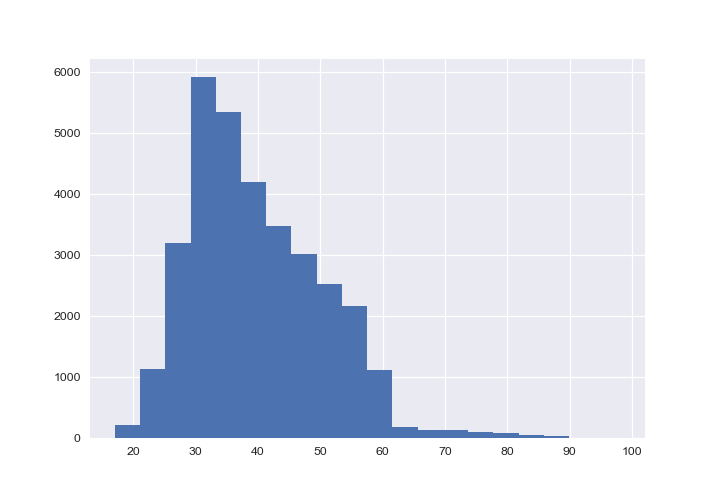

In [55]:
train['age'].hist(bins=20)

In [56]:
train['job'].value_counts()

admin.           8356
blue-collar      7352
technician       5374
services         3161
management       2340
retired          1382
entrepreneur     1197
self-employed    1148
housemaid         830
unemployed        813
student           724
unknown           273
Name: job, dtype: int64

In [57]:
pd.pivot_table(train, index='job', values='age',  aggfunc='mean')

,age
job,
admin.,38.212901
blue-collar,39.559032
entrepreneur,41.812030
housemaid,45.169880
management,42.478205
retired,62.071635
self-employed,40.006098
services,38.078456
student,25.965470


In [140]:
train['age'].describe()

count    32950.000000
mean        40.047162
std         10.439350
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         98.000000
Name: age, dtype: float64

In [58]:
train[['age','job']]

,age,job
0,41,admin.
1,55,management
2,55,admin.
3,36,admin.
4,32,entrepreneur
5,27,entrepreneur
6,55,technician
7,33,self-employed
8,35,technician
9,48,entrepreneur


In [8]:
a = (train.loc[(train['job'] == 'admin.')])[['job','age']]        #8356
b = (train.loc[(train['job'] == 'student')])[['job','age']]       #724
c = (train.loc[(train['job'] == 'services')])[['job','age']]      #3161
d = (train.loc[(train['job'] == 'technician')])[['job','age']]    #5374
e = (train.loc[(train['job'] == 'unemployed')])[['job','age']]    #813
f = (train.loc[(train['job'] == 'blue-collar')])[['job','age']]   #7352
g = (train.loc[(train['job'] == 'self-employed')])[['job','age']] #1148
h = (train.loc[(train['job'] == 'entrepreneur')])[['job','age']]  #1197
i = (train.loc[(train['job'] == 'management')])[['job','age']]    #2340
j = (train.loc[(train['job'] == 'housemaid')])[['job','age']]     #830
k = (train.loc[(train['job'] == 'unknown')])[['job','age']]       #273
l = (train.loc[(train['job'] == 'retired')])[['job','age']]       #1382

aa = (train.loc[(train['education'] == 'high.school')])[['education','age']]    #5374
bb = (train.loc[(train['education'] == 'basic.4y')])[['education','age']]      #3161
cc = (train.loc[(train['education'] == 'professional.course')])[['education','age']]    #813
dd = (train.loc[(train['education'] == 'university.degree')])[['education','age']]   #7352
ee = (train.loc[(train['education'] == 'basic.6y')])[['education','age']]       #724
ff = (train.loc[(train['education'] == 'basic.9y')])[['education','age']]        #8356
gg = (train.loc[(train['education'] == 'unknown')])[['education','age']] #1148
hh = (train.loc[(train['education'] == 'illiterate')])[['education','age']]

<IPython.core.display.Javascript object>


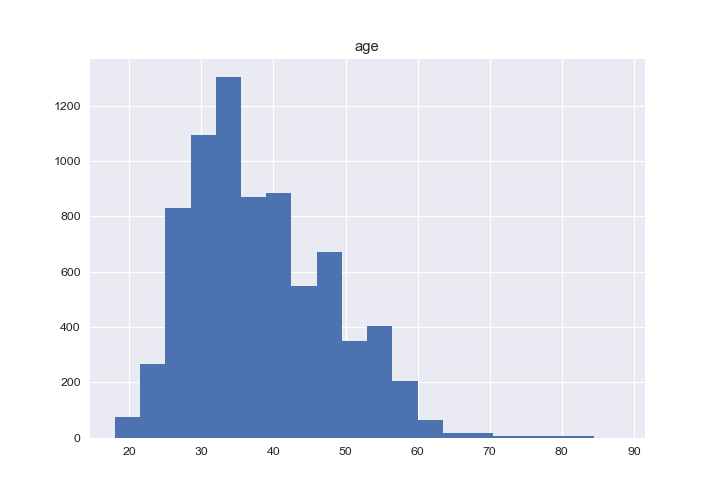

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BAD6C18>]], dtype=object)

In [65]:
aa.count() #7635 #mean - 38; median - 36 #high.school
aa.hist(bins=20)

In [46]:
bb.median() #3330 #mean - 46.6; median - 47 #basic.4y

age    47.0
dtype: float64

In [49]:
cc.median() #count - 4194 #mean -40 ; median - 38 #professional.course

age    38.0
dtype: float64

In [52]:
dd.median() #count - 9716 #mean - 38.9 ; median - 36 #university.degree

age    36.0
dtype: float64

In [55]:
ee.median() #count - 1815 #mean - 40.5; median - 40 #basic.6y

age    40.0
dtype: float64

In [58]:
ff.median() #count - 4846 #mean - 39 ; median - 38 #basic.9y

age    38.0
dtype: float64

In [61]:
gg.median() #count - 1412 #mean - 43.5; median - 43.5 #unknown

age    43.5
dtype: float64

In [64]:
hh.median() #count - 12 #mean - 48.08; median - 45 #illiterate

age    45.0
dtype: float64

<IPython.core.display.Javascript object>


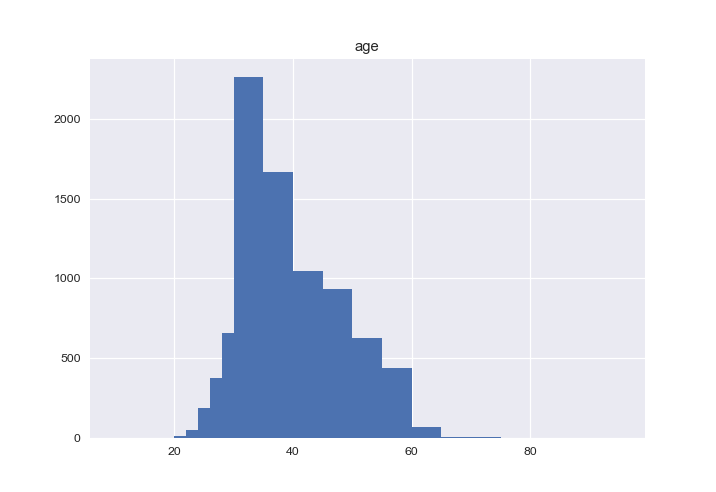

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BA7E668>]], dtype=object)

In [6]:
a.hist(bins=[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95]) #8356 (admin) 
#mean - 38.2
# Skewed to the right, Around 66% of the admins are aged less than 40 and 90% of them are less than 51 years

In [38]:
l['age'].mean()


62.07163531114327

<IPython.core.display.Javascript object>


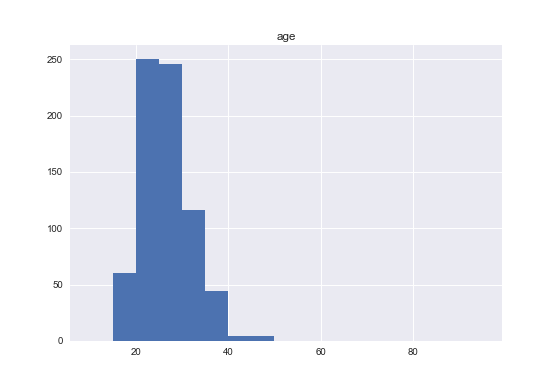

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000EC55EF0>]], dtype=object)

In [63]:
b.hist(bins=[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95])       #724 (student)
#mean - 25.96
#Skewed to the right and 87% of the students are ages less than 32 and 78% of them are less than 28

<IPython.core.display.Javascript object>


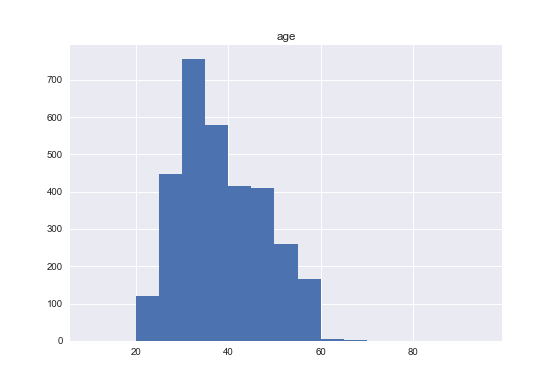

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000FF24DA0>]], dtype=object)

In [64]:
c.hist(bins=[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95])     #316 (services)
#mean - 38.07
# Skewed to the right. Around 87% of the people who are in 'services' are less than 50 years old 
# and 60 % of them are less than 40 years.

<IPython.core.display.Javascript object>


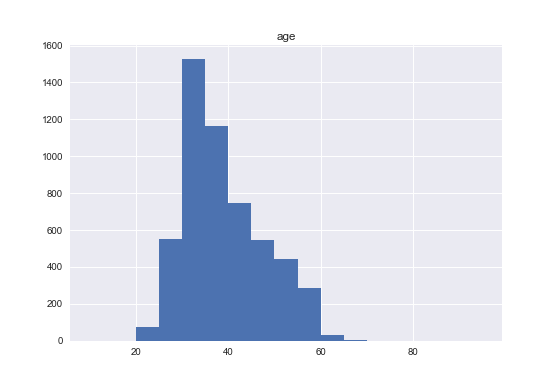

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000010151B00>]], dtype=object)

In [65]:
d.hist(bins=[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95])   #5374 (technician)
#d mean - 38.53
#Skewed to the right. Largely concentrated at the center (about 50% are in 30-40) and 76% are less than 45 years

<IPython.core.display.Javascript object>


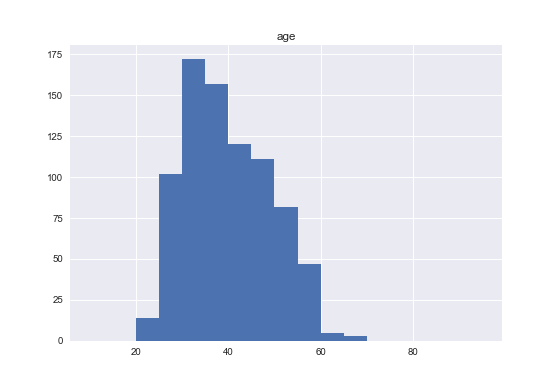

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000102367B8>]], dtype=object)

In [66]:
e.hist(bins=[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95])   #813 (unemployed)
#e mean - 39.46
# Combed distribution (Assumption)... 88% of the customers are unemployed between 25-50.
# IS THIS THE CORRECT INTERPRETATION

# Comb. In a comb distribution, the bars are alternately tall and short. 
# This distribution often results from rounded-off data and/or an incorrectly constructed histogram. 

<IPython.core.display.Javascript object>


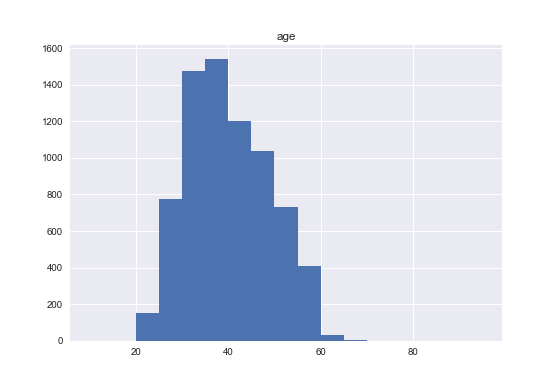

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001051AC88>]], dtype=object)

In [67]:
f.hist(bins=[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95])  #7352 (blue-collar)
#f mean - 39.55
# Uniform or Skewed to the right? 
# Not uniform because data is not uniformly distributed on either sides of either mean (39.5) or median (39).
# Data is skewed to the right with 85% of the blue-collared jobs are held between the 25-50 age group. 

<IPython.core.display.Javascript object>


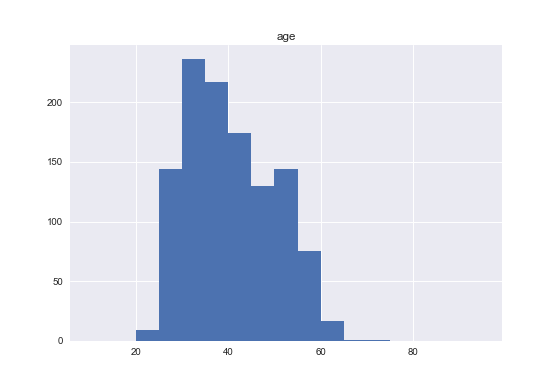

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000010412BA8>]], dtype=object)

In [68]:
g.hist(bins=[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95])#1148 (self-employed)
#g mean - 40.00
# Data skewed to the right. 70% of the self-employed persons are less than 45 years old

<IPython.core.display.Javascript object>


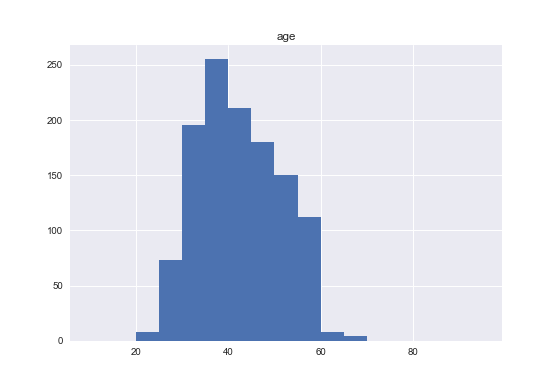

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000014490CC0>]], dtype=object)

In [69]:
h.hist(bins=[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95]) #1197 (entrepreneur)
#h mean - 41.81
# h.describe() #42
# h.median() #41
# Skewed to th right and 77% of the entrepreneurs are less than 50 years old

<IPython.core.display.Javascript object>


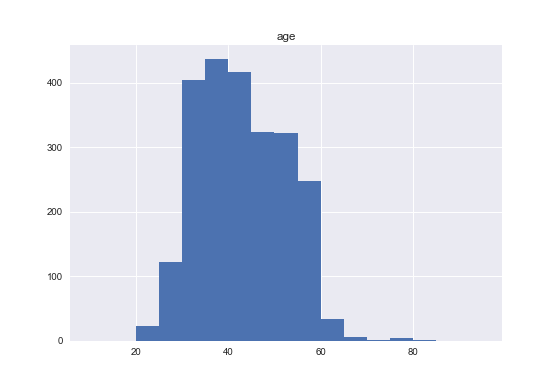

age    42.0
dtype: float64

In [70]:
i.hist(bins=[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95])   #2340 (management)
#i mean - 42.47
# Skewed to the right and 91% of people in management are less than 55 years
i.mean() #42.5
i.median() #42

<IPython.core.display.Javascript object>


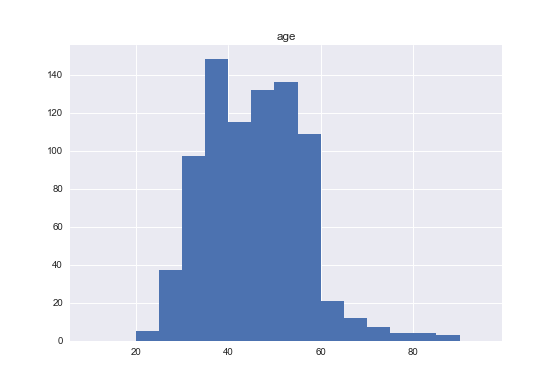

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000146542E8>]], dtype=object)

In [71]:
j.hist(bins=[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95])   #830 (housemaid)
#j mean - 45.16
# Skewed to the right?? (55% of the data is to the left of mean and 45% of the data is to the right). 
# 93% of the housemaids are less than 60 years 

# j.mean()#45
# j.median() #45

<IPython.core.display.Javascript object>


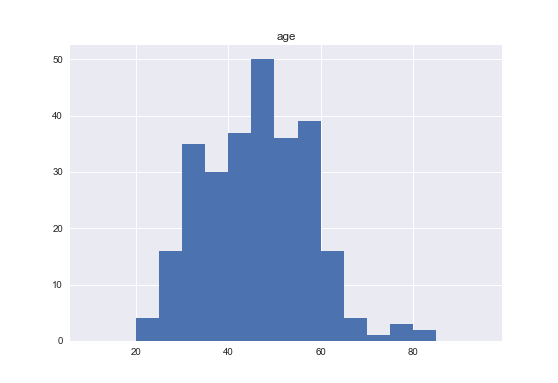

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000100B31D0>]], dtype=object)

In [59]:
k.hist(bins=[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95])      #273 (unknown)
#k mean - 45.47
# 87% of the 'unknown' category jobs are between 35-60 years age group

<IPython.core.display.Javascript object>


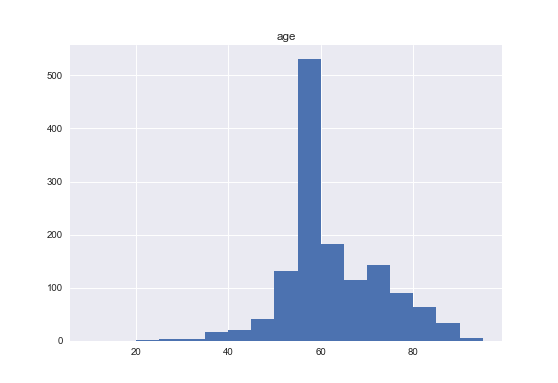

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000EBF0B70>]], dtype=object)

In [61]:
l.hist(bins=[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95])      #1382 (retired)
WHAT DISTRIBUTION
#l mean - 62.07
# 80% of the retired people are between 50-65 age greoup and addition 20% from 65-75... 
# 95% of the retired people are above 50


In [ ]:
# There is rapid increase from 20-25 and 25-30 age groups but 
# Data is mostly concentrated between 30-50 year age group. (except for students)
# There is gradual decline in age groups beyond 50 (except for retired) 

In [ ]:
#......................Week 3.................
# Finish Project Proposal
# Create age categories (different sets)
# Explore other variable to find any new trends

In [13]:
# def func():
#     z = pd.DataFrame(train)
#     z.apply(len)


In [3]:
z = pd.DataFrame(train)
z

,age,job,marital,education,default,housing,personal,contact_type,month,day,...,dcontacts,pdays,pcontacts,poutcome,evr,cpi,cci,euribor,employees,y
0,41,admin.,single,professional.course,no,yes,yes,cellular,apr,fri,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
1,55,management,married,basic.9y,no,yes,no,cellular,jul,wed,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
2,55,admin.,married,high.school,no,yes,no,cellular,apr,wed,...,3,999,1,failure,-1.8,93.075,-47.1,1.415,5099.1,no
3,36,admin.,divorced,university.degree,no,no,yes,cellular,nov,thu,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no
4,32,entrepreneur,single,university.degree,no,yes,no,telephone,may,tue,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,27,entrepreneur,divorced,university.degree,unknown,no,no,telephone,may,thu,...,5,999,1,failure,-1.8,92.893,-46.2,1.266,5099.1,no
6,55,technician,married,university.degree,no,no,no,telephone,jun,tue,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
7,33,self-employed,married,basic.9y,unknown,no,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
8,35,technician,married,professional.course,no,yes,no,telephone,may,wed,...,1,999,1,failure,-1.8,92.893,-46.2,1.281,5099.1,no
9,48,entrepreneur,married,basic.9y,unknown,yes,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no


In [46]:
# z = train.copy(deep=True)
# z['job_len']= z['job'].apply(len)

In [30]:
# (z.iloc[1])['age']
# y['age'].replace([41,55], ['Four-One','Five-Five'])

0         Four-One
1        Five-Five
2        Five-Five
3               36
4               32
5               27
6        Five-Five
7               33
8               35
9               48
10              52
11              53
12              36
13       Five-Five
14              35
15              35
16              37
17              57
18              45
19        Four-One
20              33
21              38
22       Five-Five
23              31
24       Five-Five
25              49
26              40
27              27
28              43
29              43
           ...    
32920           38
32921           36
32922           34
32923           27
32924           49
32925           33
32926           31
32927           45
32928           56
32929           59
32930           39
32931           52
32932           24
32933           22
32934           43
32935           66
32936           34
32937           56
32938           39
32939           32
32940           78
32941       

In [5]:
#........................DANGER......................
# def func():
#     ct = z['age'].count()
#     for i in range(ct):
#         if ( ((z.iloc[1])['age'])> 0 and ((z.iloc[1])['age'])<=50):
#             (z.iloc[i])['age'] = 'Below Fifty'
#         else:    
#             (z.iloc[i])['age'] = 'Above Fifty'
# func()

In [ ]:
# f = lambda x: x + 1
# f(3)

In [47]:
# def test1(a):   #single bin[0-20]....bins of 2 [24-54]....bins of 5 [55-80]....single bin [75-100] 
#     if(a>0 and a<=20):
#         return "Cat 1"
#     elif (a>20 and a<=24):
#         return "Cat 2"
#     elif (a>24 and a<=26):
#         return "Cat 3"
#     elif (a>26 and a<=28):
#         return "Cat 4"
#     elif (a>28 and a<=30):
#         return "Cat 5"
#     elif (a>30 and a<=32):
#         return "Cat 6"
#     elif (a>32 and a<=34):
#         return "Cat 7"
#     elif (a>34 and a<=36):
#         return "Cat 8"
#     elif (a>36 and a<=38):
#         return "Cat 9"
#     elif (a>38 and a<=40):
#         return "Cat 10"
#     elif (a>40 and a<=42):
#         return "Cat 11"
#     elif (a>42 and a<=44):
#         return "Cat 12"
#     elif (a>44 and a<=46):
#         return "Cat 13"
#     elif (a>46 and a<=48):
#         return "Cat 14"
#     elif (a>48 and a<=50):
#         return "Cat 15"
#     elif (a>50 and a<=52):
#         return "Cat 16"
#     elif (a>52 and a<=54):
#         return "Cat 17"
#     elif (a>=55 and a<=60):
#         return "Cat 18"
#     elif (a>60 and a<=65):
#         return "Cat 19"
#     elif (a>65 and a<=70):
#         return "Cat 20"
#     elif (a>70 and a<=75):
#         return "Cat 21"
#     elif (a>75 and a<=80):
#         return "Cat 22"
#     elif (a>80 and a<=100):
#         return "Cat 23"


# def test2(a): #single bin[0-20]....bins of 4 [24-60]....bins of 5 [60-75]....single bin [75-100] 
#     if(a>0 and a<=20):
#         return "Cat 1"
#     elif (a>20 and a<=24):
#         return "Cat 2"
#     elif (a>24 and a<=28):
#         return "Cat 3"
#     elif (a>28 and a<=32):
#         return "Cat 4"
#     elif (a>32 and a<=36):
#         return "Cat 5"
#     elif (a>36 and a<=40):
#         return "Cat 6"
#     elif (a>40 and a<=44):
#         return "Cat 7"
#     elif (a>44 and a<=48):
#         return "Cat 8"
#     elif (a>48 and a<=52):
#         return "Cat 9"
#     elif (a>52 and a<=56):
#         return "Cat 10"
#     elif (a>56 and a<=60):
#         return "Cat 11"
#     elif (a>60 and a<=65):
#         return "Cat 12"
#     elif (a>65 and a<=70):
#         return "Cat 13"
#     elif (a>70 and a<=75):
#         return "Cat 14"
#     elif (a>75 and a<=100):
#         return "Cat 15"



# z['age_cat_1'] = z.apply(lambda row: test1(row['age']), axis=1)
# z['age_cat_2'] = z.apply(lambda row: test2(row['age']), axis=1)

In [48]:
z

,age,job,marital,education,default,housing,personal,contact_type,month,day,...,pcontacts,poutcome,evr,cpi,cci,euribor,employees,y,age_cat_1,age_cat_2
0,41,admin.,single,professional.course,no,yes,yes,cellular,apr,fri,...,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no,Cat 11,Cat 7
1,55,management,married,basic.9y,no,yes,no,cellular,jul,wed,...,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no,Cat 18,Cat 10
2,55,admin.,married,high.school,no,yes,no,cellular,apr,wed,...,1,failure,-1.8,93.075,-47.1,1.415,5099.1,no,Cat 18,Cat 10
3,36,admin.,divorced,university.degree,no,no,yes,cellular,nov,thu,...,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no,Cat 8,Cat 5
4,32,entrepreneur,single,university.degree,no,yes,no,telephone,may,tue,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Cat 6,Cat 4
5,27,entrepreneur,divorced,university.degree,unknown,no,no,telephone,may,thu,...,1,failure,-1.8,92.893,-46.2,1.266,5099.1,no,Cat 4,Cat 3
6,55,technician,married,university.degree,no,no,no,telephone,jun,tue,...,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no,Cat 18,Cat 10
7,33,self-employed,married,basic.9y,unknown,no,no,cellular,jul,thu,...,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no,Cat 7,Cat 5
8,35,technician,married,professional.course,no,yes,no,telephone,may,wed,...,1,failure,-1.8,92.893,-46.2,1.281,5099.1,no,Cat 8,Cat 5
9,48,entrepreneur,married,basic.9y,unknown,yes,no,telephone,may,tue,...,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no,Cat 14,Cat 8


In [9]:
# marital status
pd.crosstab(z.marital, z.y, normalize='index')
# ..............All categories are almost similarly distributed (83%-90% for NOs) 
#let it be.....COmbe back to it during....ML process for variable importance or feature importance

y,no,yes
marital,,
divorced,0.893209,0.106791
married,0.897718,0.102282
single,0.859706,0.140294
unknown,0.838710,0.161290


In [10]:
# Contact Type
pd.crosstab(z.contact_type, z.y, normalize ='index')
#let it be

y,no,yes
contact_type,,
cellular,0.850950,0.149050
telephone,0.947971,0.052029


In [13]:
train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'personal',
       'contact_type', 'month', 'day', 'duration', 'dcontacts', 'pdays',
       'pcontacts', 'poutcome', 'evr', 'cpi', 'cci', 'euribor', 'employees',
       'y'],
      dtype='object')

In [4]:
# .......................SET CATEGORIES................

# df["Status"] = df["Status"].astype("category")
# df["Status"].cat.set_categories(["won","pending","presented","declined"],inplace=True)

In [12]:
pd.crosstab(z.day, z.y, normalize ='columns')
#Mid week (Tue, Wed and Thu) had the highest positive responsive rate
#let it be

y,no,yes
day,,
fri,0.189982,0.184393
mon,0.209429,0.183324
thu,0.206382,0.227953
tue,0.196967,0.203902
wed,0.197240,0.200428


In [24]:
duration_yes = z.loc[z['y']=='yes']
duration_no = z.loc[z['y']=='no']

In [20]:
duration_yes

,age,job,marital,education,default,housing,personal,contact_type,month,day,...,dcontacts,pdays,pcontacts,poutcome,evr,cpi,cci,euribor,employees,y
13,55,management,married,university.degree,no,yes,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,yes
27,27,admin.,single,high.school,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,yes
32,33,admin.,married,university.degree,no,yes,no,cellular,mar,wed,...,3,4,1,success,-1.8,93.369,-34.8,0.655,5008.7,yes
35,58,housemaid,married,basic.4y,no,no,no,telephone,may,wed,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.281,5099.1,yes
58,54,services,divorced,university.degree,no,no,no,cellular,may,tue,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.344,5099.1,yes
67,46,admin.,divorced,university.degree,no,no,no,telephone,oct,mon,...,1,999,0,nonexistent,-0.1,93.798,-40.4,4.912,5195.8,yes
73,29,admin.,married,high.school,no,no,no,cellular,jun,mon,...,1,999,1,failure,-2.9,92.963,-40.8,1.260,5076.2,yes
84,49,technician,single,university.degree,no,yes,no,cellular,apr,thu,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,yes
101,29,admin.,single,university.degree,no,yes,yes,cellular,aug,wed,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,yes
102,33,admin.,single,professional.course,no,no,no,cellular,may,mon,...,1,999,1,failure,-1.8,92.893,-46.2,1.244,5099.1,yes


In [47]:
duration_no

,age,job,marital,education,default,housing,personal,contact_type,month,day,...,dcontacts,pdays,pcontacts,poutcome,evr,cpi,cci,euribor,employees,y
0,41,admin.,single,professional.course,no,yes,yes,cellular,apr,fri,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
1,55,management,married,basic.9y,no,yes,no,cellular,jul,wed,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
2,55,admin.,married,high.school,no,yes,no,cellular,apr,wed,...,3,999,1,failure,-1.8,93.075,-47.1,1.415,5099.1,no
3,36,admin.,divorced,university.degree,no,no,yes,cellular,nov,thu,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no
4,32,entrepreneur,single,university.degree,no,yes,no,telephone,may,tue,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,27,entrepreneur,divorced,university.degree,unknown,no,no,telephone,may,thu,...,5,999,1,failure,-1.8,92.893,-46.2,1.266,5099.1,no
6,55,technician,married,university.degree,no,no,no,telephone,jun,tue,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
7,33,self-employed,married,basic.9y,unknown,no,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
8,35,technician,married,professional.course,no,yes,no,telephone,may,wed,...,1,999,1,failure,-1.8,92.893,-46.2,1.281,5099.1,no
9,48,entrepreneur,married,basic.9y,unknown,yes,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no


<IPython.core.display.Javascript object>


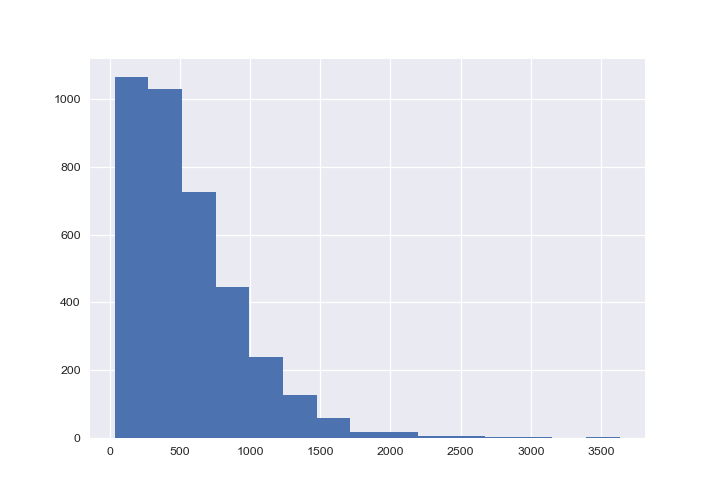

In [80]:
duration_yes['duration'].hist(bins=15)

<IPython.core.display.Javascript object>


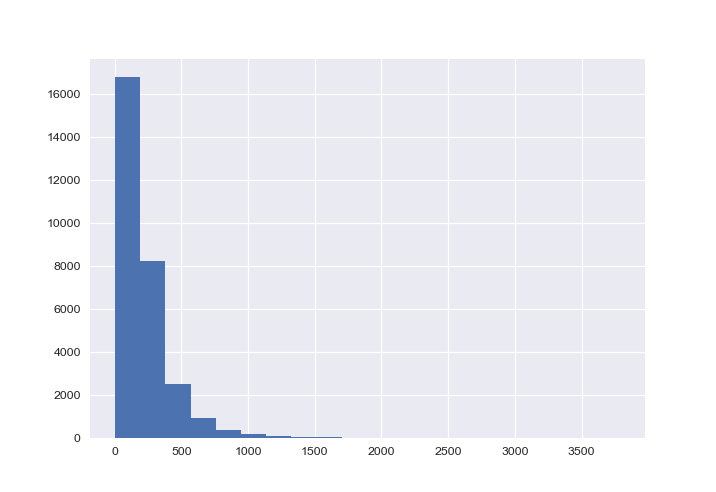

In [29]:
duration_no['duration'].hist(bins=20)

In [ ]:
# From the above two graphs, it is evident that if the call duration is less than 300 seconds, 
# the customer is more 
# is more likely to says 'NO' and if the call lasts for more than 300 seconds, 
# the customer is more likely to say 'Yes'

In [ ]:
# ......................NOTE FOR DURATION VARIABLE..................
# Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). 
# Yet, the duration is not known before a call is performed. 
# Also, after the end of the call y is obviously known. 
# Thus, this input should only be included for benchmark purposes and 
# should be discarded if the intention is to have a realistic predictive model.

#two dataframe - one with the var... one without

<IPython.core.display.Javascript object>


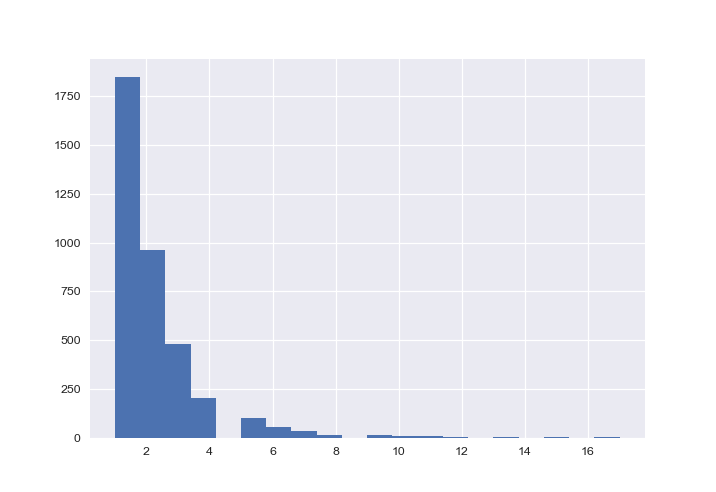

In [45]:
# z['dcontacts'].hist(bins=20)
duration_yes['dcontacts'].hist(bins=20)

<IPython.core.display.Javascript object>


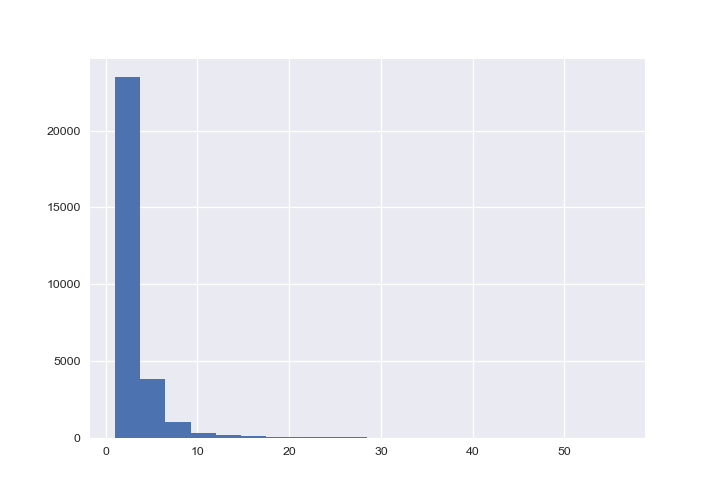

In [46]:
duration_no['dcontacts'].hist(bins=20)

In [ ]:
# The above two histograms are drawn differently. Look at the size of X-Labels  
# It looks like both the graphs have the similar behaviour. It's hard to differentiate.
# But we can infer that if a customer is made more than two contacts, they are highly likely to say 
# 'yes' than 'no'

In [78]:
pd.pivot_table(train, values = ['dcontacts'], index=['job'], columns='y', aggfunc='mean')
#the difference is very little except for 'housemaid' and 'unemployed'

dcontacts          
y                    no       yes
job                              
admin.         2.727160  2.085366
blue-collar    2.584721  2.098814
entrepreneur   2.576256  2.009804
housemaid      2.801619  1.943820
management     2.514231  2.011236
retired        2.648491  1.932394
self-employed  2.684262  2.152000
services       2.615438  2.227799
student        2.243902  1.827586
technician     2.651965  2.105085
unemployed     2.756484  1.915966
unknown        2.701245  2.625000

<IPython.core.display.Javascript object>


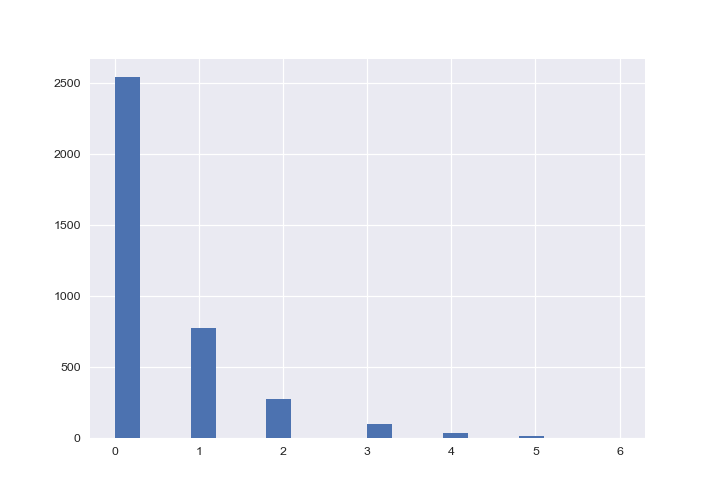

In [50]:
duration_yes['pcontacts'].hist(bins=20)

<IPython.core.display.Javascript object>


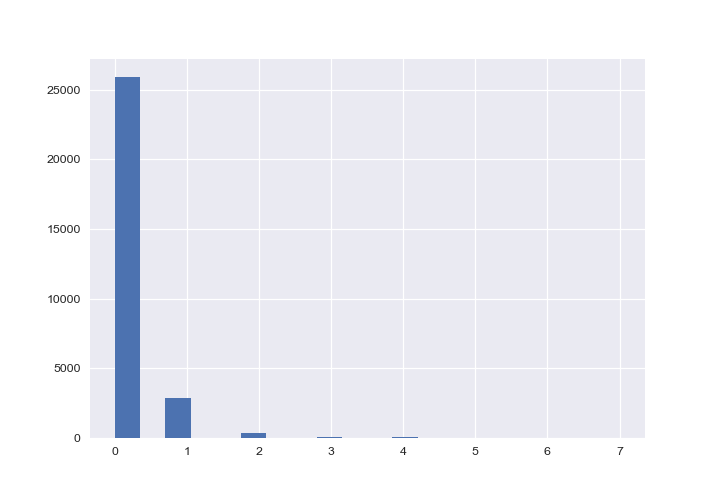

In [51]:
duration_no['pcontacts'].hist(bins=20)

In [ ]:
# ...............THIS GRAPH IMPLIES THE SAME AS 'DCONTATCS'.................

In [55]:
pd.crosstab(z.poutcome,z.y, normalize='index')

y,no,yes
poutcome,,
failure,0.857312,0.142688
nonexistent,0.910610,0.089390
success,0.341644,0.658356


<IPython.core.display.Javascript object>


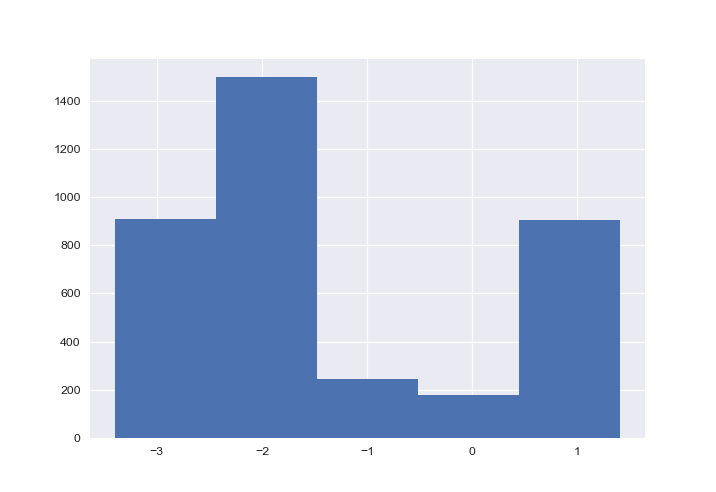

In [81]:
duration_yes['evr'].hist(bins=5) #bi modal 

<IPython.core.display.Javascript object>


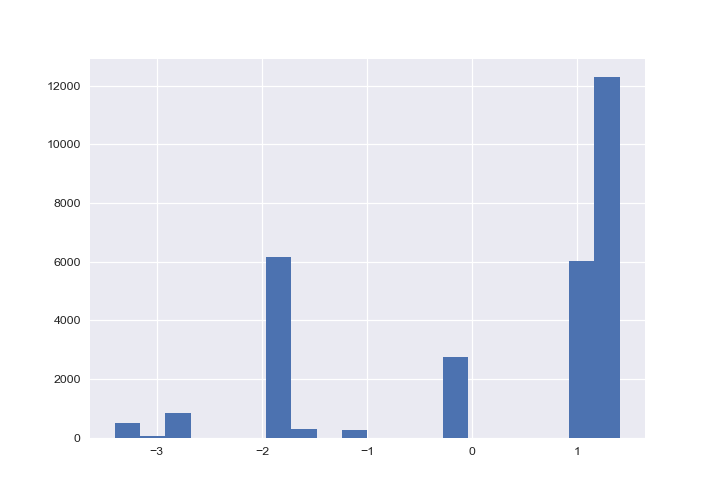

In [62]:
duration_no['evr'].hist(bins=20)

In [ ]:
# The above graph suggests that if evr is greater than -1, the customers are more likely to respond 'NO'
# Contrast to this, if evr is less than -1, the customers are more likely to respond 'YES' 

<IPython.core.display.Javascript object>


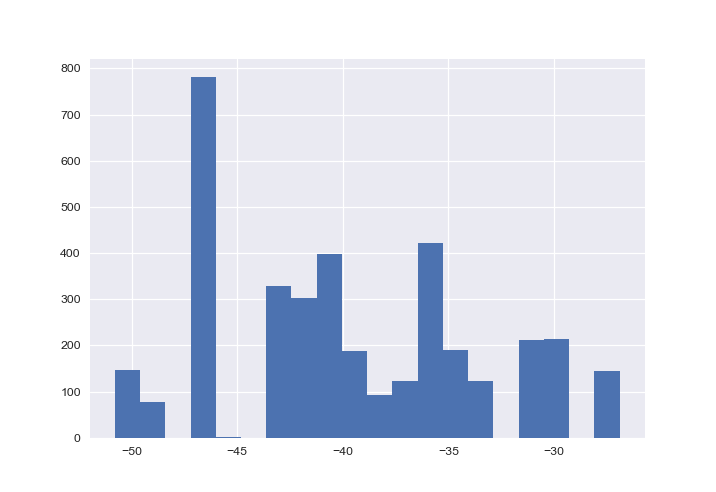

In [64]:
duration_yes['cci'].hist(bins=20)

<IPython.core.display.Javascript object>


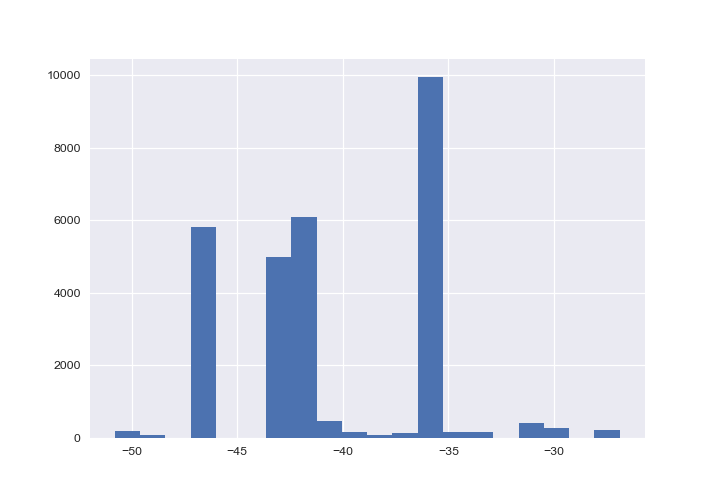

In [65]:
duration_no['cci'].hist(bins=20)

In [ ]:
# ......Is this MULTI-MODAL......

In [79]:
pd.crosstab(z.)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'personal',
       'contact_type', 'month', 'day', 'duration', 'dcontacts', 'pdays',
       'pcontacts', 'poutcome', 'evr', 'cpi', 'cci', 'euribor', 'employees',
       'y'],
      dtype='object')

# Week 4

In [ ]:
# To-Do
# (i) Create brand new dataframes with respect to 'duration' column
#     (a) without column 'duration'
#     (b) with column 'duration' 
#     (c) with column 'duration' and upper bound

# (ii) Re-Categorize age column such that 
#     (a) All categories are of equal size
#     (b) Outliers are consolidated in on category

# (iii) Create dummy variables

In [4]:
# Dataframe without duration column
df400 = train.copy(deep=True)
df400 = df400.drop('duration',1)

In [6]:
df400.shape

(32950, 20)

In [7]:
df401 = train.copy(deep=True) #dataframe with duration column
df402 = train.copy(deep=True) #dataframe with upper and lower bound for duration columns

In [8]:
# Creating upper and lower bounds for duration column
df402['duration'] = df402['duration'].apply(lambda x: int(math.floor(x / 10.0)) * 10 if(x%10<5) else int(math.ceil(x / 10.0)) * 10 ) 

In [44]:
df402['duration']

0          40
1         420
2         140
3          60
4         240
5          10
6         130
7         360
8          70
9         200
10        260
11        310
12         60
13        950
14         90
15        160
16        140
17         40
18        100
19        160
20        120
21         90
22        540
23         60
24         90
25        550
26        260
27       1450
28        260
29        750
         ... 
32920      60
32921      80
32922      60
32923     220
32924     470
32925     110
32926     170
32927     830
32928     940
32929     440
32930     270
32931    1130
32932      20
32933     200
32934      50
32935     120
32936     240
32937     160
32938     170
32939     450
32940     100
32941      80
32942    1560
32943     360
32944     340
32945     440
32946     310
32947      90
32948     800
32949      80
Name: duration, Length: 32950, dtype: int64

In [4]:
z = train.copy(deep=True)

In [10]:
def final_test(a): #single bin[0-20]....bins of 4 [24-60]....bins of 5 [60-75]....single bin [75-100] 
    if(a>0 and a<=24):
        return "Cat 1"
    elif (a>24 and a<=31):
        return "Cat 2"
    elif (a>31 and a<=35):
        return "Cat 3"
    elif (a>35 and a<=41):
        return "Cat 4"
    elif (a>41 and a<=49):
        return "Cat 5"
    elif (a>49 and a<=60):
        return "Cat 6"
    elif (a>60 and a<=100):
        return "Cat 7"

z['age_cat'] = z.apply(lambda row: final_test(row['age']), axis=1)

In [105]:
z['age_cat'].value_counts()

Cat 4    6750
Cat 2    6623
Cat 5    6482
Cat 3    5768
Cat 6    5741
Cat 1     845
Cat 7     741
Name: age_cat, dtype: int64

In [106]:
# Cat 1 - 00 to 24 (inclusive) - 845
# Cat 2 - 24 to 31 (inclusive) - 6623
# Cat 3 - 31 to 35 (inclusive) - 5768
# Cat 4 - 35 to 41 (inclusive) - 6750
# Cat 5 - 41 to 49 (inclusive) - 6482
# Cat 6 - 49 to 60 (inclusive) - 5741
# Cat 7 - 60 to 100 (inclusive)- 741

In [11]:
zz = train.copy(deep=True)
# trn_e1 = pd.get_dummies(trn_e1, columns=['education'])

In [12]:
z['job'].replace(['blue-collar', 'services', 'entrepreneur', 'housemaid', 'self-employed', 'technician', 'management', 
                  'unknown', 'admin.', 'unemployed', 'retired', 'student'],
                  ['jl4', 'jl4', 'jl4', 'jl3', 'jl3', 'jl3', 'jl3', 'jl2', 'jl2', 'jl2', 'jl1', 'jl1'], 
                  inplace=True)
                      
                      
z['education'].replace(['basic.9y','basic.6y','basic.4y','high.school','professional.course','university.degree','unknown','illiterate'],
                      ['el4','el4','el3','el3','el3','el2','el2','el1'], 
                      inplace=True)
                      
z['month'].replace(['may','jul','nov','aug','jun','apr','oct','sep','dec','mar'],
                      ['ml3','ml3','ml3','ml3','ml3','ml2','ml1','ml1','ml1','ml1'], 
                      inplace=True)
                      
                      
                      
z = pd.get_dummies(z, columns=['job','education','month','age_cat'])

In [111]:
z.head()

,age,marital,default,housing,personal,contact_type,day,duration,dcontacts,pdays,...,month_ml1,month_ml2,month_ml3,age_cat_Cat 1,age_cat_Cat 2,age_cat_Cat 3,age_cat_Cat 4,age_cat_Cat 5,age_cat_Cat 6,age_cat_Cat 7
0,41,single,no,yes,yes,cellular,fri,41,1,999,...,0,1,0,0,0,0,1,0,0,0
1,55,married,no,yes,no,cellular,wed,421,2,999,...,0,0,1,0,0,0,0,0,1,0
2,55,married,no,yes,no,cellular,wed,140,3,999,...,0,1,0,0,0,0,0,0,1,0
3,36,divorced,no,no,yes,cellular,thu,56,2,999,...,0,0,1,0,0,0,1,0,0,0
4,32,single,no,yes,no,telephone,tue,242,2,999,...,0,0,1,0,0,1,0,0,0,0


In [113]:
z.columns

Index(['age', 'marital', 'default', 'housing', 'personal', 'contact_type',
       'day', 'duration', 'dcontacts', 'pdays', 'pcontacts', 'poutcome', 'evr',
       'cpi', 'cci', 'euribor', 'employees', 'y', 'job_jl1', 'job_jl2',
       'job_jl3', 'job_jl4', 'education_el1', 'education_el2', 'education_el3',
       'education_el4', 'month_ml1', 'month_ml2', 'month_ml3', 'age_cat_Cat 1',
       'age_cat_Cat 2', 'age_cat_Cat 3', 'age_cat_Cat 4', 'age_cat_Cat 5',
       'age_cat_Cat 6', 'age_cat_Cat 7'],
      dtype='object')

## Week 5

In [1]:
# (a) Explore missing values for each column
#     Replace with mean, median or mode respectively

# (b) Normalize the numerical data columns.... Not the categorical columns
#     Use scalar package from scikit-learn
    
# (c) Create a data frame with new column for 'weekend', 'weekday_end', 'weekday_late' 

# (d) Treat outliers with transformations such as 90th percentiles, upper or lower bounds, logarithmic transformations etc.
#     Replace valid outliers with logarithmic transformation
#     Replace invalid outliers (human-error) with 90th percentile or upper bounds OR exclude the record from the dataframe. 

# (e) Create dummy variables for all categorical variables.
#     There should be only categorical data at the end
#     Explore one-hard encoding in sci-kit learn

In [5]:
#Checking if the dataframe has any null or NaN values
z.isnull().values.any()
#The df does not have any missing values

False